# Nullstellen

## Vertiefung

### Übersicht

- Toleranz als Abbruchkriterium
- Mehrere Nullstellen
- Nullstellen bestimmen mit [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Toleranz als Abbruchkriterium

Die folgende Funktion hat nur eine (reelle) Nullstelle und zwar bei $x=1$:

$$ f(x) = (x-4)^3 + 1 $$

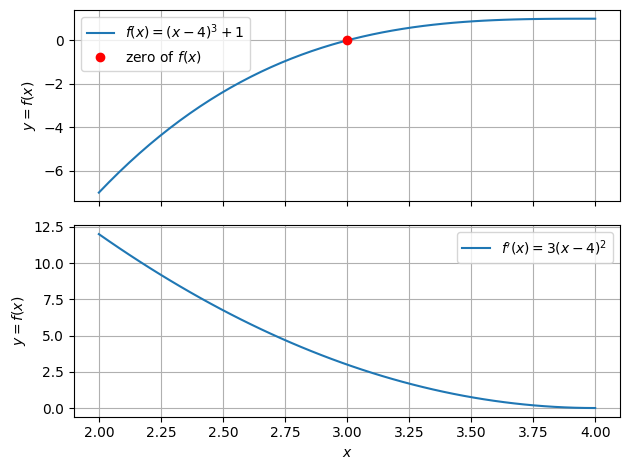

In [2]:
def f(x):
    return (x - 4) ** 3 + 1


def fprime(x):
    return 3 * (x - 4) ** 2


x = np.linspace(2, 4)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, f(x), label="$f(x) = (x-4)^3 + 1$")
ax1.plot(3, 0, "ro", label="zero of $f(x)$")
ax1.set_ylabel("$y = f(x)$")
ax1.grid()
ax1.legend()
ax2.plot(x, fprime(x), label="$f'(x) = 3(x-4)^2$")
ax2.set_ylabel("$y = f(x)$")
ax2.set_xlabel("$x$")
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()


#### Fehlerabschätzung bei Bisektionsverfahren

Nach $n$ Schritten, wissen wir, dass die gesuchte Nullstelle $x$ zwischen den Intervallgrenzen $a_n$ und $b_n$ liegt, also $x\in [a_n,b_n]$. Die einfachste Schätzung der Nullstelle ist also die Mitte des Intervalls.

$$ x \simeq x_n = \frac{1}{2} \left( a_n + b_n \right) $$

Und als Fehlerabschätzung von $x$ können wir die halbe Intervallbreite nehmen

$$ \Delta_x = \frac{1}{2} \left| b_n - a_n \right| $$

Andererseits kann auch der Funktionswert an der geschätzten Nullstelle als Indikator für die Qualität der Näherung benutzt werden

$$ \Delta_y = \left| f(x_n) \right| $$

Als Abbruchkriterien können Toleranzen (obere Grenzen) für beide Fehlerabschätzungen banutzt werden.

In [3]:
def bisection(f, a0, b0, xtol, ytol, n):
    assert a0 < b0 and xtol > 0 and ytol > 0 and n >= 0
    a, b = a0, b0

    x = (a + b) / 2
    y = f(x)
    ya = f(a)
    Dx = abs(b - a) / 2
    Dy = abs(y)
    steps = 0
    res = [(steps, x, Dx, Dy)]

    while (Dx > xtol or Dy > ytol) and steps < n:
        if ya * y < 0:
            b = x
        else:
            a = x
            ya = y
        x = (a + b) / 2
        y = f(x)
        Dx = abs(b - a) / 2
        Dy = abs(y)
        steps += 1
        res.append((steps, x, Dx, Dy))
    return res


bisection(f, 1, 4, 1e-15, 1e-15, 200)


[(0, 2.5, 1.5, 2.375),
 (1, 3.25, 0.75, 0.578125),
 (2, 2.875, 0.375, 0.423828125),
 (3, 3.0625, 0.1875, 0.176025390625),
 (4, 2.96875, 0.09375, 0.096710205078125),
 (5, 3.015625, 0.046875, 0.046146392822265625),
 (6, 2.9921875, 0.0234375, 0.023621082305908203),
 (7, 3.00390625, 0.01171875, 0.011673033237457275),
 (8, 2.998046875, 0.005859375, 0.005870826542377472),
 (9, 3.0009765625, 0.0029296875, 0.002926827408373356),
 (10, 2.99951171875, 0.00146484375, 0.0014655591221526265),
 (11, 3.000244140625, 0.000732421875, 0.0007322430756175891),
 (12, 2.9998779296875, 0.0003662109375, 0.00036625564280257095),
 (13, 3.00006103515625, 0.00018310546875, 0.0001830942931064783),
 (14, 2.999969482421875, 9.1552734375e-05, 9.155552837114556e-05),
 (15, 3.0000152587890625, 4.57763671875e-05, 4.577566869912175e-05),
 (16, 2.9999923706054688, 2.288818359375e-05, 2.288835821717683e-05),
 (17, 3.0000038146972656, 1.1444091796875e-05, 1.1444048141129315e-05),
 (18, 2.999998092651367, 5.7220458984375e-06

Machen wir noch eine Darstellung davon

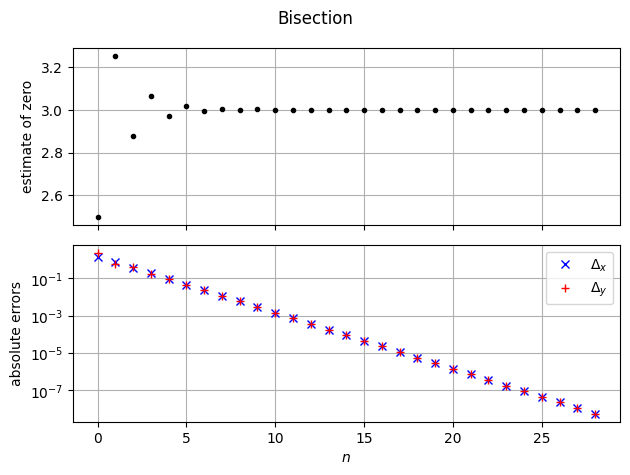

In [4]:
res = bisection(f, 1, 4, 1e-8, 1e-8, 200)
steps, x, Dx, Dy = np.array(res).T

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(steps, x, "k.", label="$x_n$")
ax1.set_ylabel("estimate of zero")
ax1.grid()
ax2.set_yscale("log")
ax2.plot(steps, Dx, "bx", label="$\Delta_x$")
ax2.plot(steps, Dy, "r+", label="$\Delta_y$")
ax2.set_ylabel("absolute errors")
ax2.set_xlabel("$n$")
ax2.grid()
ax2.legend()
plt.suptitle("Bisection")
plt.tight_layout()
plt.show()


#### Fehlerabschätzung beim Newton-Verfahren

Wieder können wir den Funktionswert an der Stelle $x_n$ als Indikator der Qualität der Schätzung der Nullstelle verwenden:

$$ \Delta_y = \left| f(x_n) \right| $$

Allerdings ist eine Abschätzung des Fehlers in $x$-Richtung schwieriger. Als Abbruchkriterium können wir aber die Distanz nehmen, die in $x$-RIchtung seit der letzten Iteration zurückgelegt wurde, also

$$ \Delta_x \simeq \left| x_{n+1} - x_n \right| = \left| \dfrac{f(x_n)}{f'(x_n)} \right|$$

In [5]:
def newton(f, fprime, x0, xtol, ytol, n):
    assert xtol > 0 and ytol > 0 and n >= 0
    x = x0
    y = f(x)
    y_by_yprime = y / fprime(x)
    Dy = abs(y)
    Dx = abs(y_by_yprime)
    steps = 0
    res = [(steps, x, Dx, Dy)]
    while (Dx > xtol or Dy > ytol) and steps < n:
        x = x - y_by_yprime
        y = f(x)
        y_by_yprime = y / fprime(x)
        Dy = abs(y)
        Dx = abs(y_by_yprime)
        steps += 1
        res.append((steps, x, Dx, Dy))
    return res


newton(f, fprime, 1, 1e-15, 1e-15, 200)


[(0, 1, 0.9629629629629629, 26),
 (1, 1.9629629629629628, 0.5986817671666157, 7.45272570238277),
 (2, 2.5616447301295784, 0.31833288653391245, 1.9757641445533984),
 (3, 2.8799776166634907, 0.10762012295463978, 0.40501223465536906),
 (4, 2.9875977396181304, 0.012250949021287004, 0.03767013700020705),
 (5, 2.9998486886394176, 0.00015128847007275055, 0.00045400277059504113),
 (6, 2.9999999771094905, 2.2890508958047195e-08, 6.867153001799409e-08),
 (7, 2.9999999999999996, 4.440892098500622e-16, 1.3322676295501878e-15),
 (8, 3.0, 0.0, 0.0)]

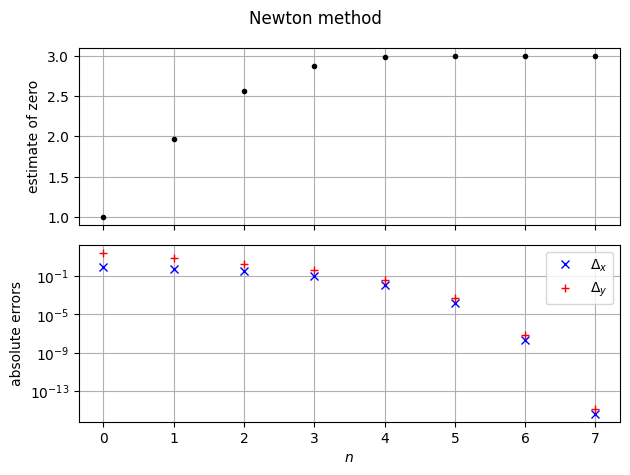

In [6]:
res = newton(f, fprime, 1, 1e-10, 1e-10, 200)
steps, x, Dx, Dy = np.array(res).T

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(steps, x, "k.", label="$x_n$")
ax1.set_ylabel("estimate of zero")
ax1.grid()
ax2.set_yscale("log")
ax2.plot(steps, Dx, "bx", label="$\Delta_x$")
ax2.plot(steps, Dy, "r+", label="$\Delta_y$")
ax2.set_ylabel("absolute errors")
ax2.set_xlabel("$n$")
ax2.legend()
ax2.grid()
plt.suptitle("Newton method")
plt.tight_layout()
plt.show()


### Mehrere Nullstellen

Sinus- und Cosinus-Funktionen haben unendlich viele Nullstellen

$$ g(x) = 2\cos(x) + 0.5 $$

In diesem Fall können wir sie auch nicht einfach analytisch berechnen:

$$ x = \arccos(-0.25) $$

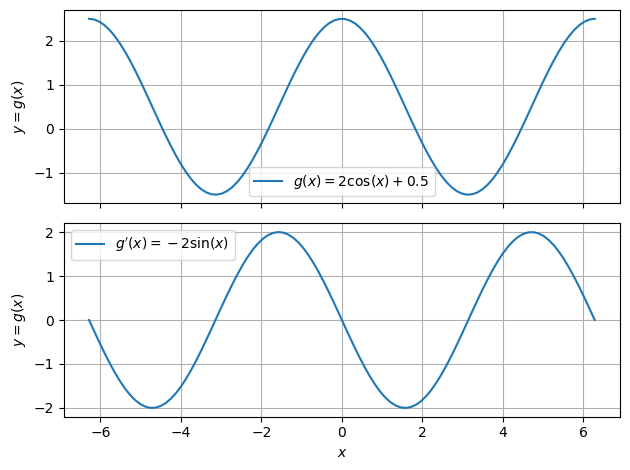

In [7]:
def g(x):
    return 2 * np.cos(x) + 0.5


def gprime(x):
    return -2 * np.sin(x)


x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, g(x), label="$g(x) = 2\cos(x) + 0.5$")
ax1.set_ylabel("$y = g(x)$")
ax1.grid()
ax1.legend()
ax2.plot(x, gprime(x), label="$g'(x) = -2\sin(x)$")
ax2.set_ylabel("$y = g(x)$")
ax2.set_xlabel("$x$")
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()


Welche Nullstelle von einem Algorithmus gefunden wird, hängt von den Anfangsbedingungen ab. Beim Newton-Verfahren ist dies der Startwert $x_0$ und beim Bisektionsverfahren ist es das Start-Intervall $[a_0,b_0].

Brobieren wir es mal mit Newton aus:

In [8]:
xtol = ytol = 1e-15
n = 100
newton(g, gprime, -4, xtol, ytol, n)[-1]


(5, -4.459708725242611, 3.4399002279594067e-16, 6.661338147750939e-16)

In [9]:
newton(g, gprime, -2, xtol, ytol, n)[-1]


(4, -1.8234765819369751, 1.146633409319802e-16, 2.220446049250313e-16)

In [10]:
newton(g, gprime, 2, xtol, ytol, n)[-1]


(4, 1.8234765819369751, 1.146633409319802e-16, 2.220446049250313e-16)

In [11]:
newton(g, gprime, 4, xtol, ytol, n)[-1]


(5, 4.459708725242611, 3.4399002279594067e-16, 6.661338147750939e-16)

Es ist unmöglich zu wissen, ob man alle Nullstellen gefunden hat. Denn es können sich immer noch mehr Nullstellen zwischen ausprobierten Startwerten befinden.

### Nullstellen bestimmen mit [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)

Siehe Übungsblatt.